In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

# modelling
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,cross_val_predict,KFold
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler

In [3]:
#load_dataset
with open("./zhengqi_train.txt")  as fr:
    data_train=pd.read_table(fr,sep="\t")
with open("./zhengqi_test.txt") as fr_test:
    data_test=pd.read_table(fr_test,sep="\t")

In [4]:
#merge train_set and test_set
data_train["oringin"]="train"
data_test["oringin"]="test"
data_all=pd.concat([data_train,data_test],axis=0,ignore_index=True)
#View data
data_all.head()

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   

     V30    V31    V32    V33    V34    V35    V36    V37  target  oringin  
0  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175    train  
1  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676    train  
2  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633    train  
3  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206    train  
4  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384    train  

[5 rows x 40 columns]

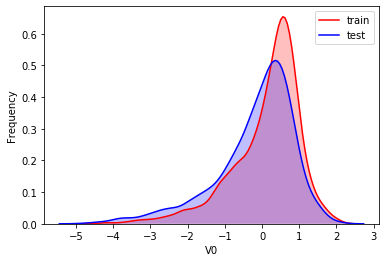

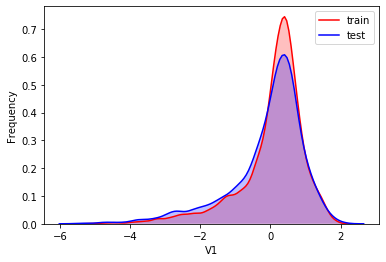

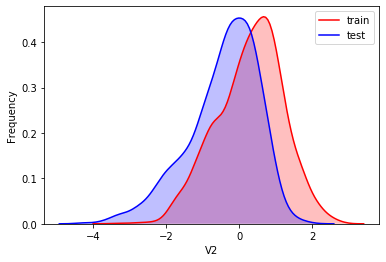

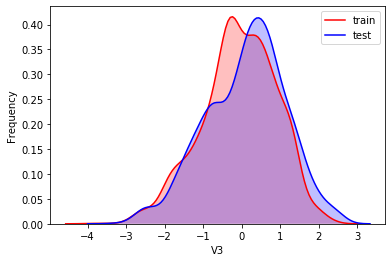

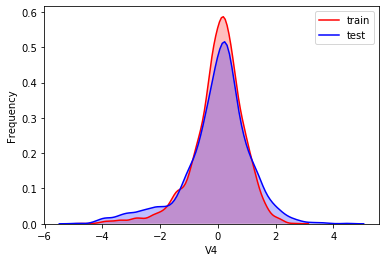

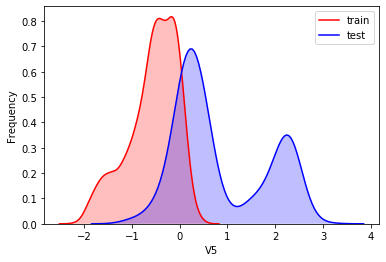

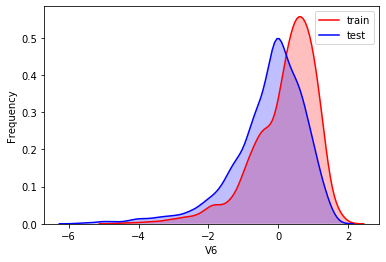

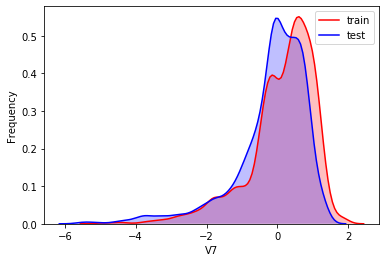

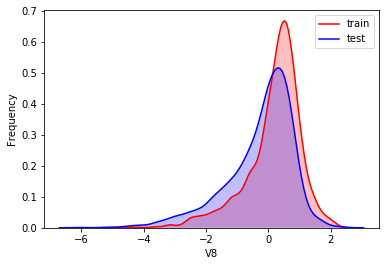

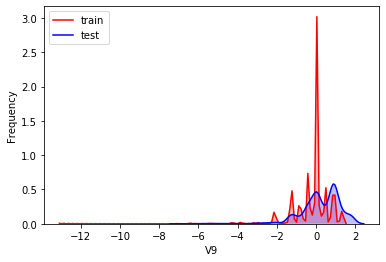

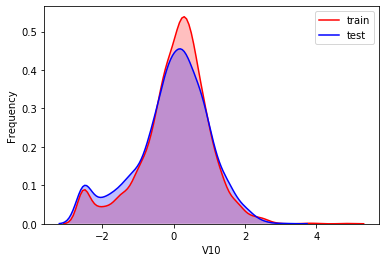

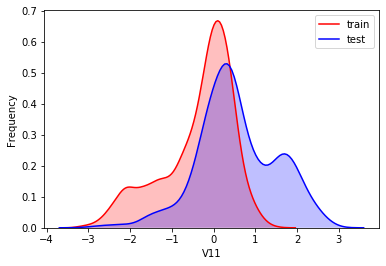

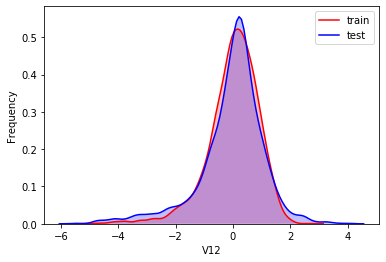

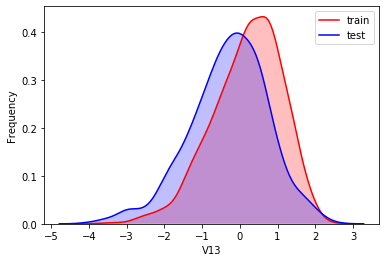

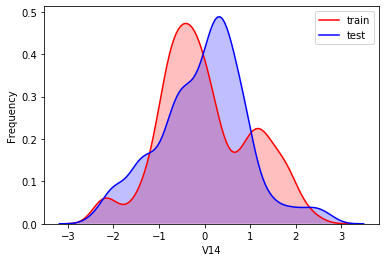

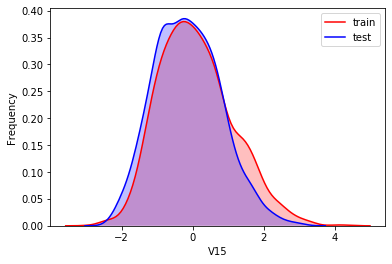

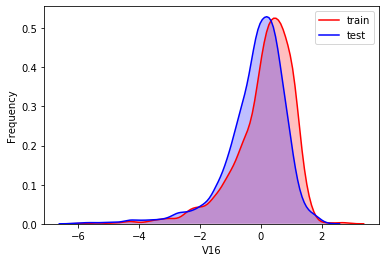

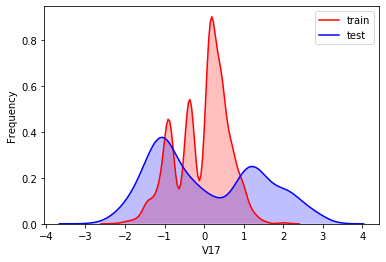

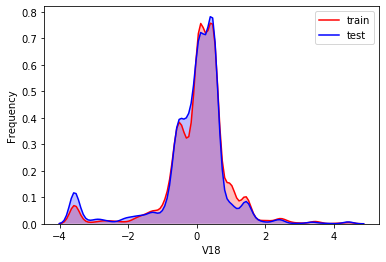

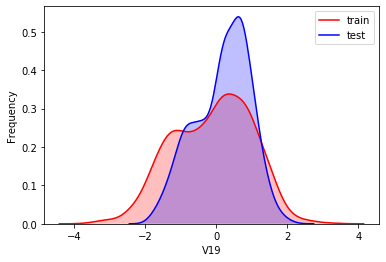

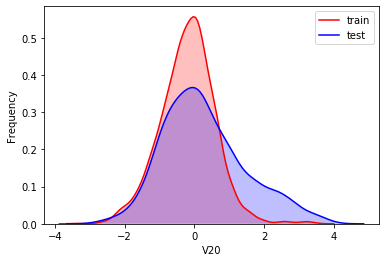

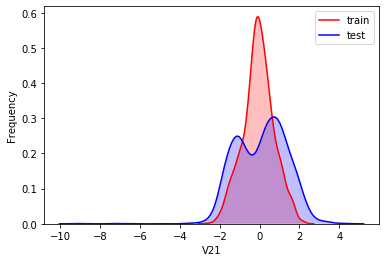

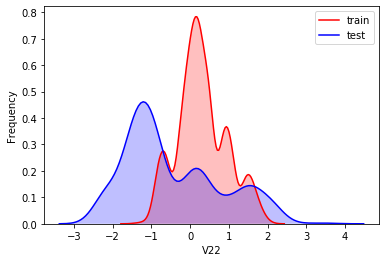

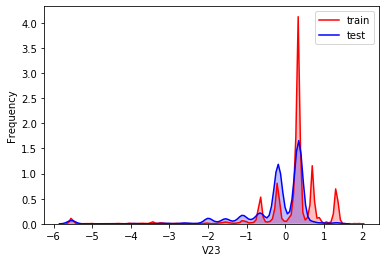

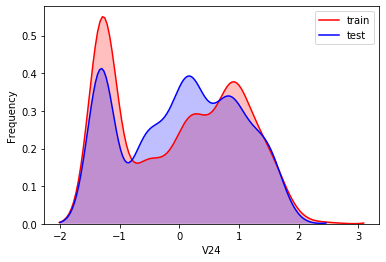

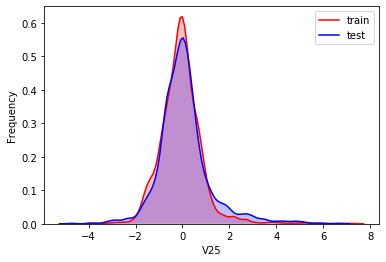

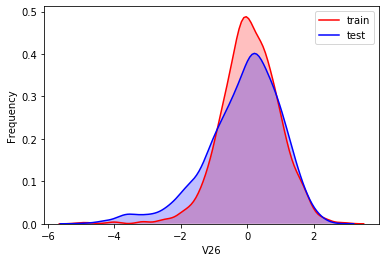

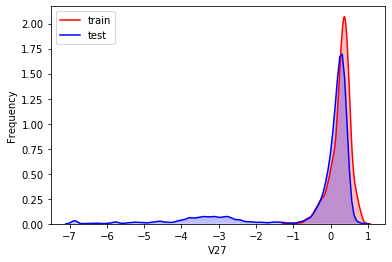

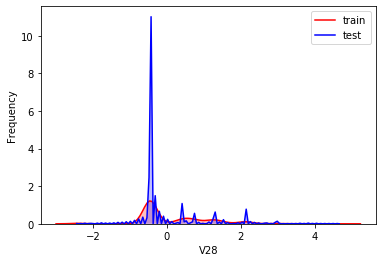

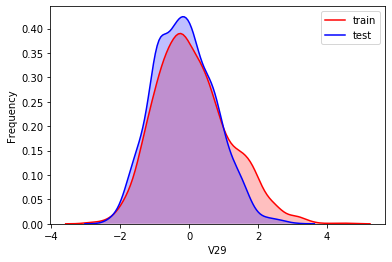

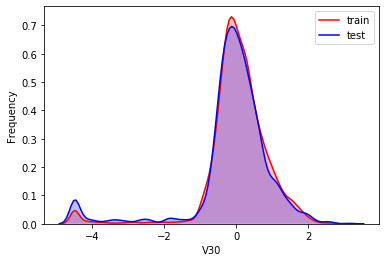

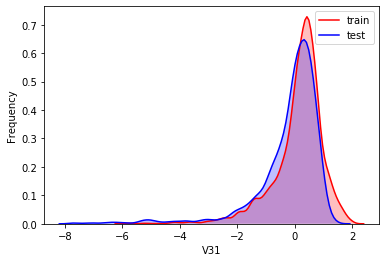

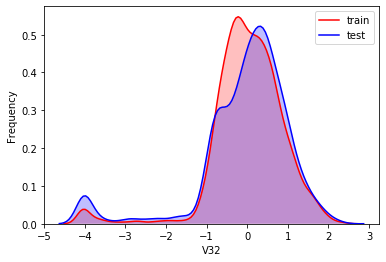

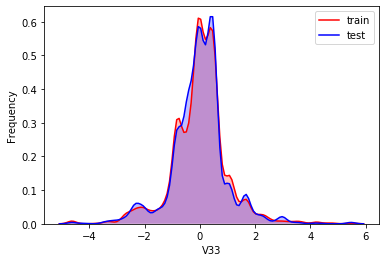

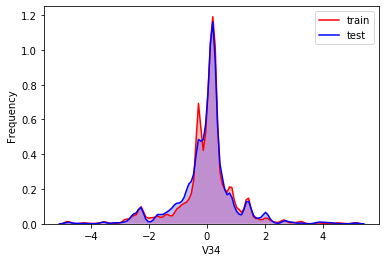

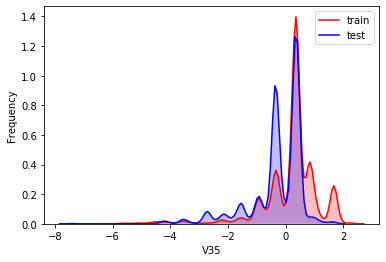

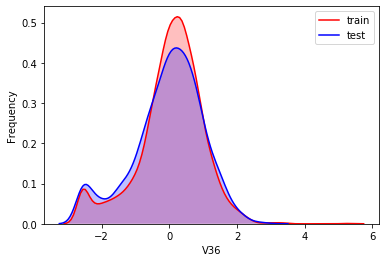

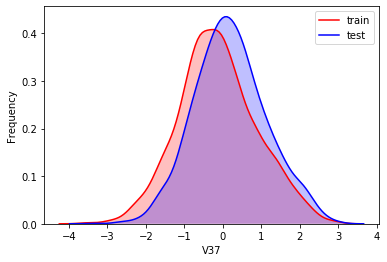

In [5]:
# Explore feature distibution 
#fig = plt.figure(figsize=(6, 6))
for column in data_all.columns[0:-2]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

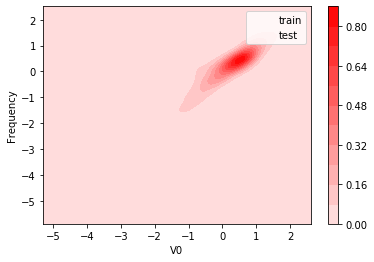

In [9]:
# Explore feature distibution 
#fig = plt.figure(figsize=(6, 6))

g = sns.kdeplot(data_all['V0'],data_all['V1'], color="Red", shade = True,cbar=True)
    #g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
g.set_xlabel(column)
g.set_ylabel("Frequency")
g = g.legend(["train","test"])
plt.show()

<Figure size 720x720 with 0 Axes>

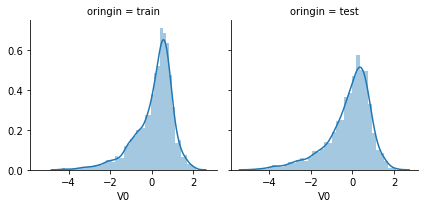

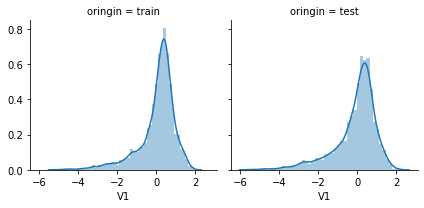

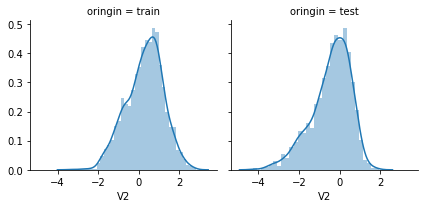

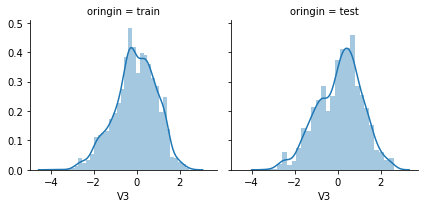

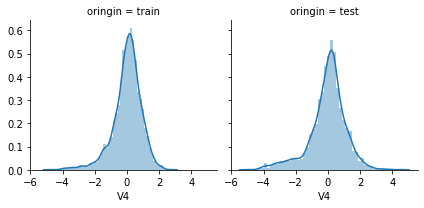

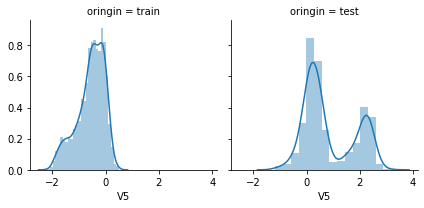

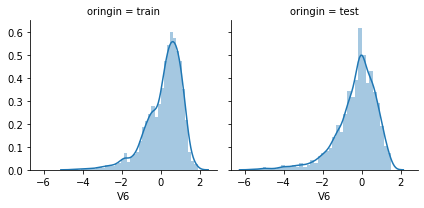

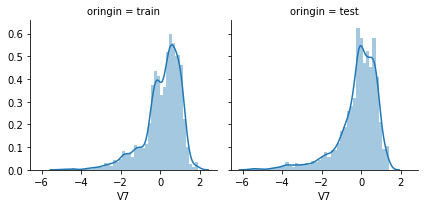

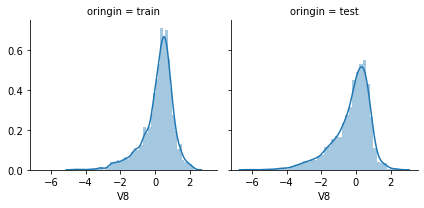

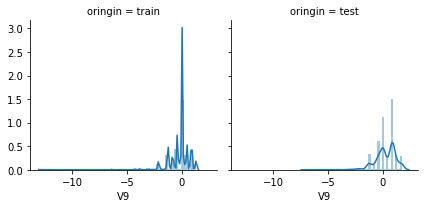

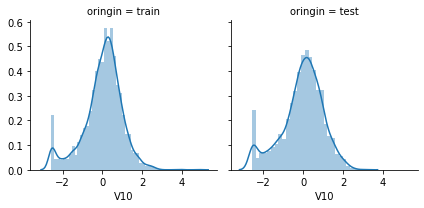

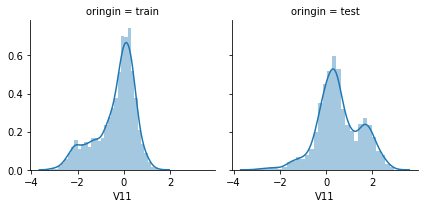

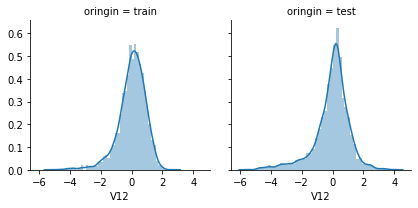

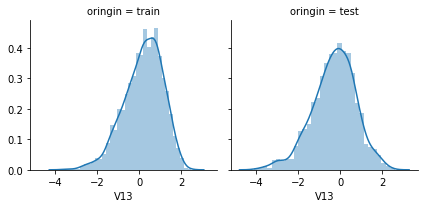

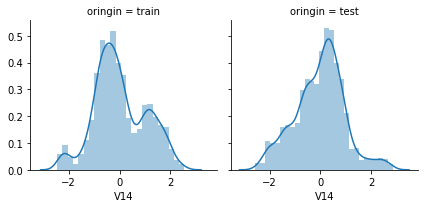

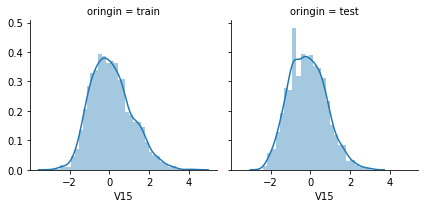

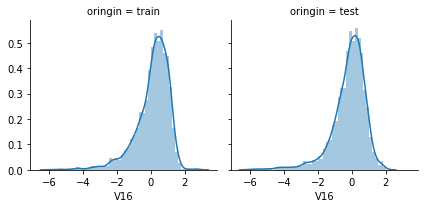

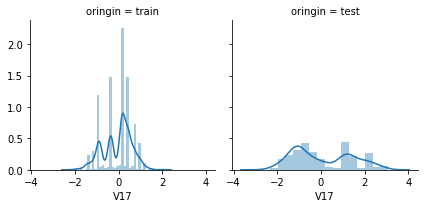

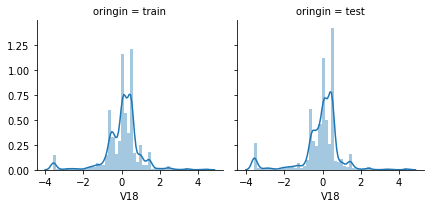

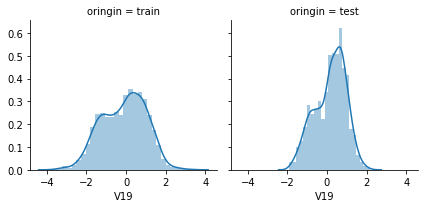

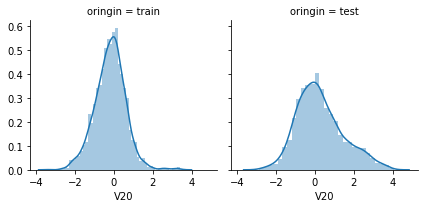

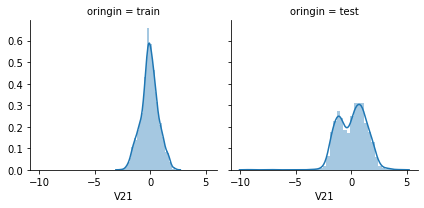

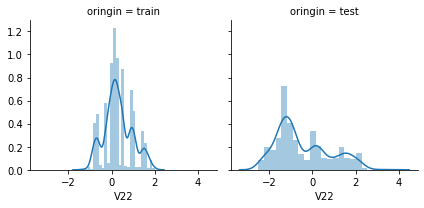

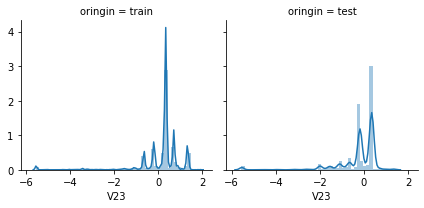

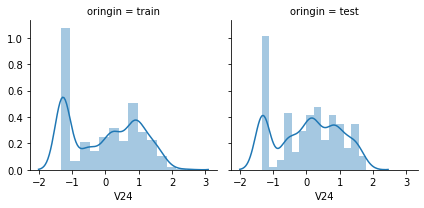

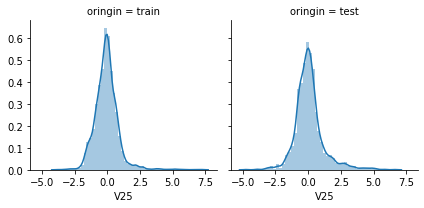

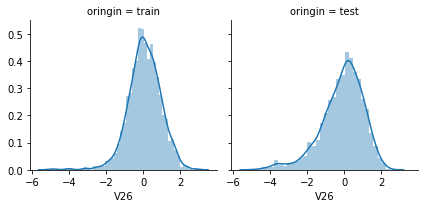

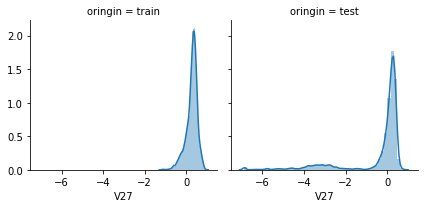

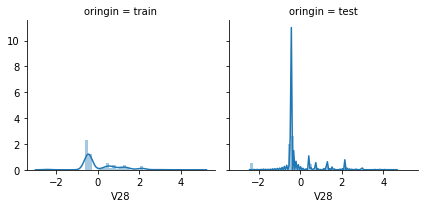

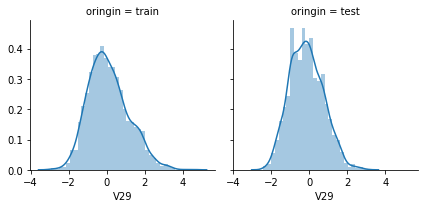

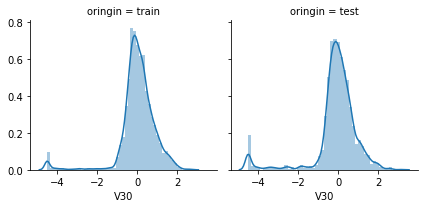

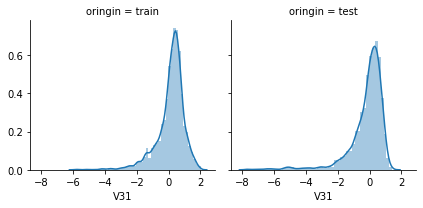

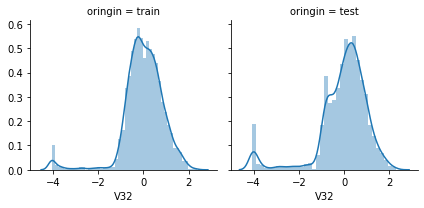

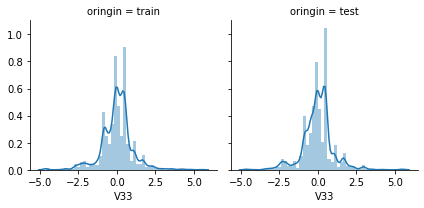

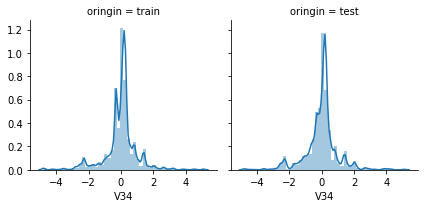

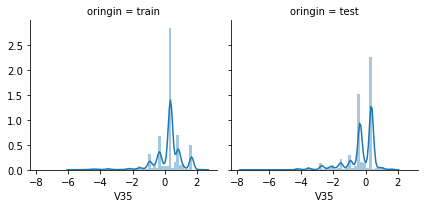

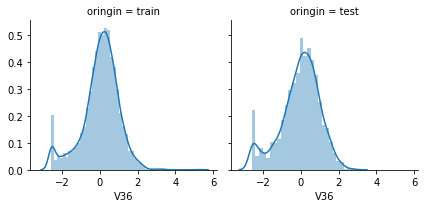

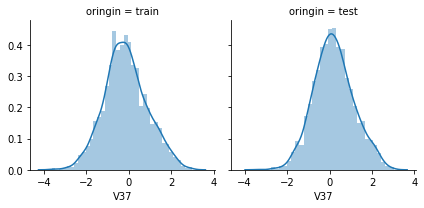

In [10]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(data_all.columns)-2):
    g = sns.FacetGrid(data_all, col='oringin')
    g = g.map(sns.distplot, data_all.columns[i])

In [ ]:
#删除特征"V5","V9","V11","V17","V22","V28"，训练集和测试集分布不均
for column in ["V5","V9","V11","V17","V22","V28"]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

data_all.drop(["V5","V9","V11","V17","V22","V28"],axis=1,inplace=True)

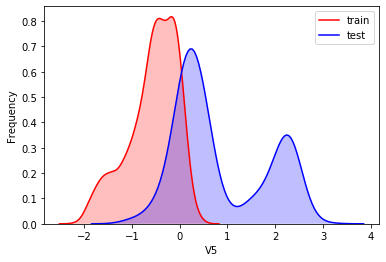

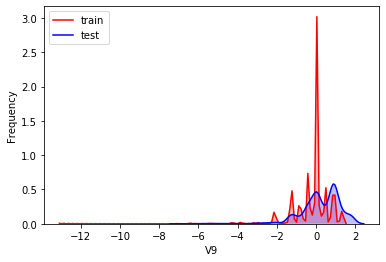

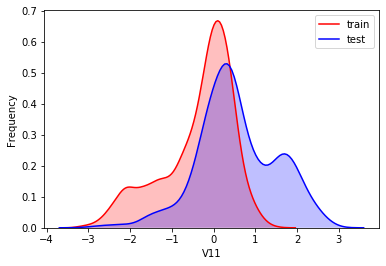

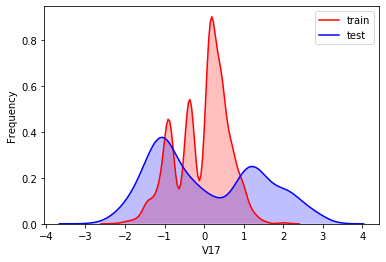

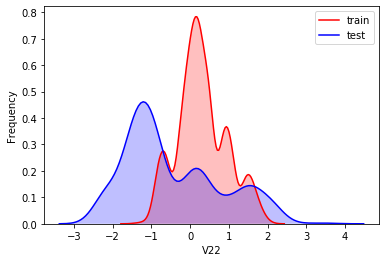

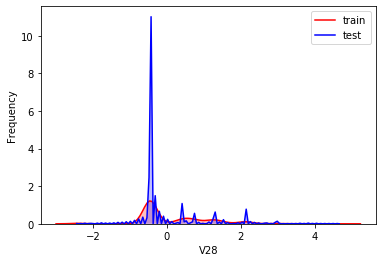

In [13]:
#删除特征"V5","V9","V11","V17","V22","V28"，训练集和测试集分布不均
for column in ["V5","V9","V11","V17","V22","V28"]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

data_all.drop(["V5","V9","V11","V17","V22","V28"],axis=1,inplace=True)

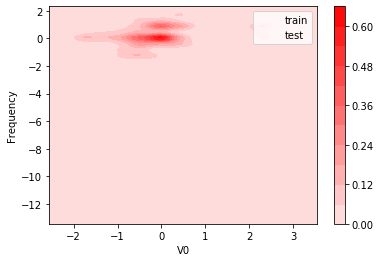

In [12]:
# Explore feature distibution 
#fig = plt.figure(figsize=(6, 6))

g = sns.kdeplot(data_all['V5'],data_all['V9'], color="Red", shade = True,cbar=True)
#g = sns.kdeplot(data_all['V9'],data_all['V11'], color="Red", shade = True,cbar=True)
#g = sns.kdeplot(data_all['V11'],data_all['V17'], color="Red", shade = True,cbar=True)
#g = sns.kdeplot(data_all['V17'],data_all['V22'], color="Red", shade = True,cbar=True)
#g = sns.kdeplot(data_all['V22'],data_all['V28'], color="Red", shade = True,cbar=True)


g.set_xlabel(column)
g.set_ylabel("Frequency")
g = g.legend(["train","test"])
plt.show()

In [14]:
data_all.isnull().sum()

V0            0
V1            0
V2            0
V3            0
V4            0
V6            0
V7            0
V8            0
V10           0
V12           0
V13           0
V14           0
V15           0
V16           0
V18           0
V19           0
V20           0
V21           0
V23           0
V24           0
V25           0
V26           0
V27           0
V29           0
V30           0
V31           0
V32           0
V33           0
V34           0
V35           0
V36           0
V37           0
target     1925
oringin       0
dtype: int64

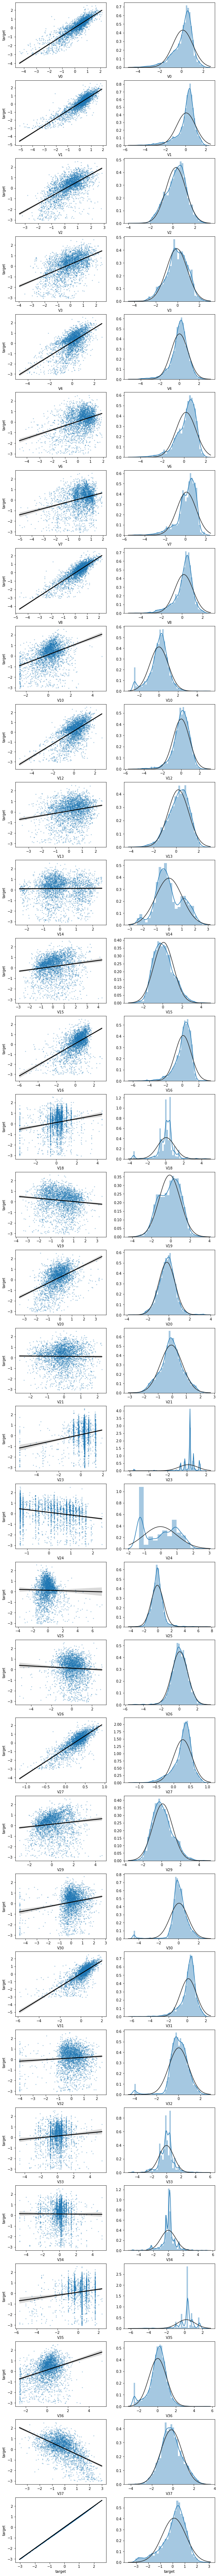

In [15]:
# figure parameters
data_train1=data_all[data_all["oringin"]=="train"].drop("oringin",axis=1)

fcols = 2
frows = len(data_train.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in data_train1.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=data_train, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(data_train[col].dropna() , fit=stats.norm)
    plt.xlabel(col)

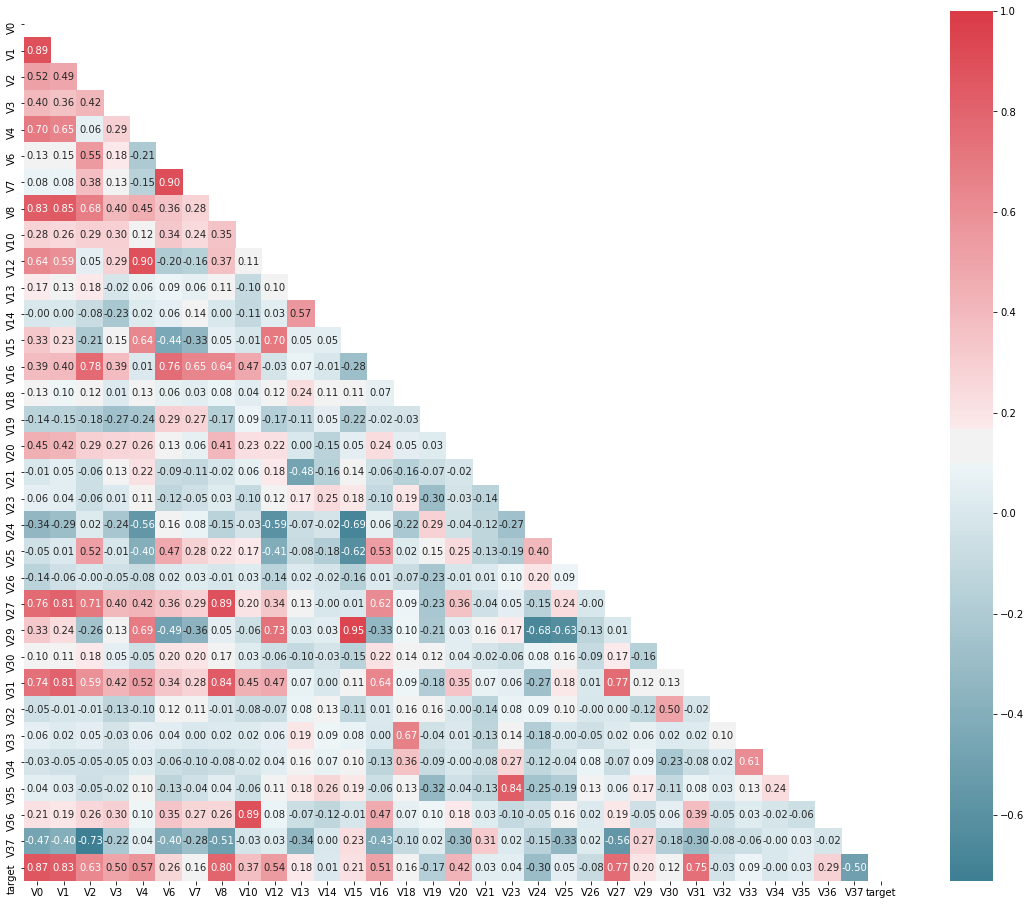

In [16]:
# 找出相关程度
plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = data_train1.columns.tolist()  # 列表头
mcorr = data_train1[colnm].corr(method="spearman")  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()

In [17]:
# Threshold for removing correlated variables
threshold = 0.1

# Absolute value correlation matrix
corr_matrix = data_train1.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
data_all.drop(drop_col,axis=1,inplace=True)

In [19]:
#data_all.info()

In [20]:
# normalise numeric columns
cols_numeric=list(data_all.columns)
print(cols_numeric)
cols_numeric.remove("oringin")
def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())
scale_cols = [col for col in cols_numeric if col!='target']
print(scale_cols)
data_all[scale_cols] = data_all[scale_cols].apply(scale_minmax,axis=0)
data_all[scale_cols].describe()

['V0', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V23', 'V24', 'V27', 'V29', 'V30', 'V31', 'V35', 'V36', 'V37', 'target', 'oringin']
['V0', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V23', 'V24', 'V27', 'V29', 'V30', 'V31', 'V35', 'V36', 'V37']


V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.694172     0.721357     0.602300     0.603139     0.523743   
std       0.144198     0.131443     0.140628     0.152462     0.106430   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626676     0.679416     0.514414     0.503888     0.478182   
50%       0.729488     0.752497     0.617072     0.614270     0.535866   
75%       0.790195     0.799553     0.700464     0.710474     0.585036   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.748823     0.745740     0.715607     0.348518     0.578507  ...   
std       0.132560     0.132577     0.118105     0.134882     0.105088  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.683324     0.696938     0.664934     0.284327     0.532892  ...   
50%       0.774125     0.771974     0.742884     0.366469     0.591635  ...   
75%       0.842259     0.836405     0.790835     0.432965     0.641971  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V20          V23          V24          V27          V29  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.456147     0.744438     0.356712     0.881401     0.388683   
std       0.134083     0.134085     0.265512     0.128221     0.133475   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.370475     0.719362     0.040616     0.888575     0.292445   
50%       0.447305     0.788817     0.381736     0.916015     0.375734   
75%       0.522660     0.792706     0.574728     0.932555     0.471837   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V30          V31          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.589459     0.792709     0.762873     0.332385     0.545795  
std       0.130786     0.102976     0.102037     0.127456     0.150356  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.550092     0.761816     0.727273     0.270584     0.445647  
50%       0.594428     0.815055     0.800020     0.347056     0.539317  
75%       0.650798     0.852229     0.800020     0.414861     0.643061  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 25 columns]

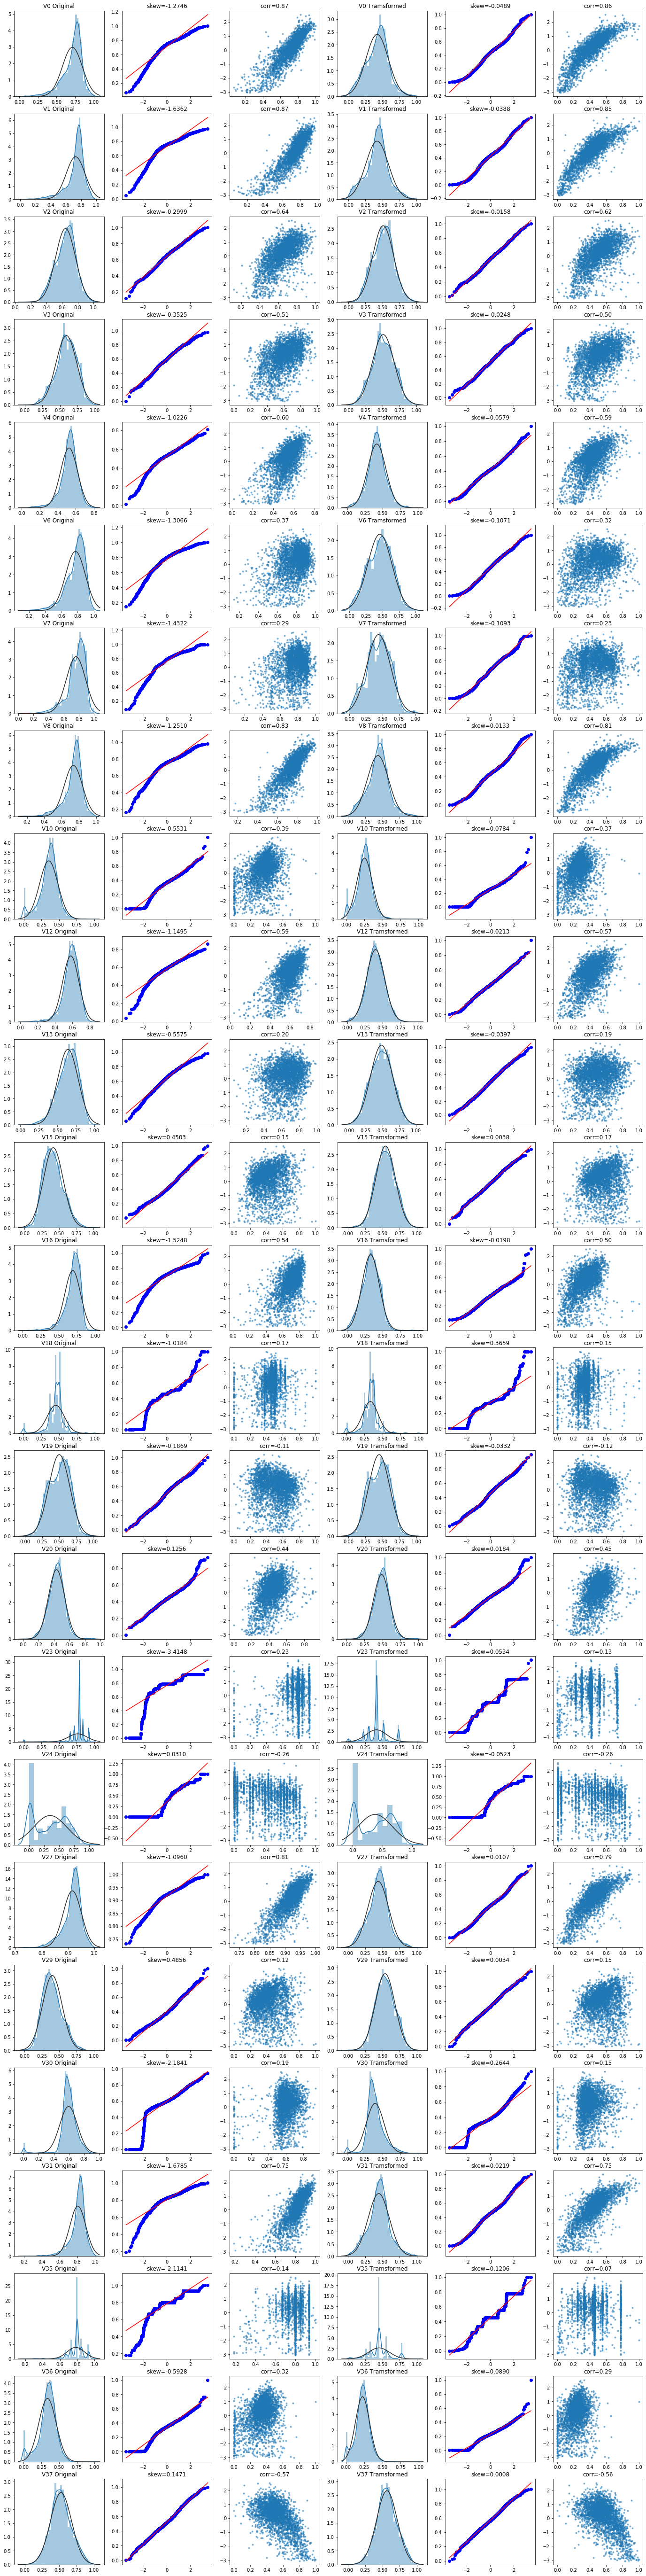

In [21]:
#Check effect of Box-Cox transforms on distributions of continuous variables

fcols = 6
frows = len(cols_numeric)-1
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric:
    if var!='target':
        dat = data_all[[var, 'target']].dropna()
        
        i+=1
        plt.subplot(frows,fcols,i)
        sns.distplot(dat[var] , fit=stats.norm);
        plt.title(var+' Original')
        plt.xlabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        _=stats.probplot(dat[var], plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
        plt.xlabel('')
        plt.ylabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        plt.plot(dat[var], dat['target'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
        i+=1
        plt.subplot(frows,fcols,i)
        trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
        trans_var = scale_minmax(trans_var)      
        sns.distplot(trans_var , fit=stats.norm);
        plt.title(var+' Tramsformed')
        plt.xlabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        _=stats.probplot(trans_var, plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
        plt.xlabel('')
        plt.ylabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        plt.plot(trans_var, dat['target'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

In [22]:
cols_transform=data_all.columns[0:-2]
for col in cols_transform:   
    # transform column
    data_all.loc[:,col], _ = stats.boxcox(data_all.loc[:,col]+1)

count    2888.000000
mean        0.126353
std         0.983966
min        -3.044000
25%        -0.350250
50%         0.313000
75%         0.793250
max         2.538000
Name: target, dtype: float64


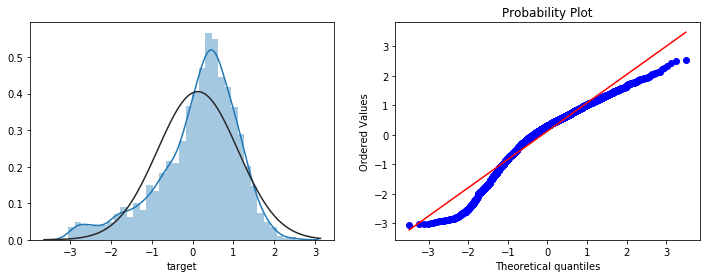

In [23]:
print(data_all.target.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data_all.target.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(data_all.target.dropna(), plot=plt)

count    2888.000000
mean        1.129957
std         0.394110
min         0.291057
25%         0.867609
50%         1.135315
75%         1.379382
max         2.798463
Name: target, dtype: float64


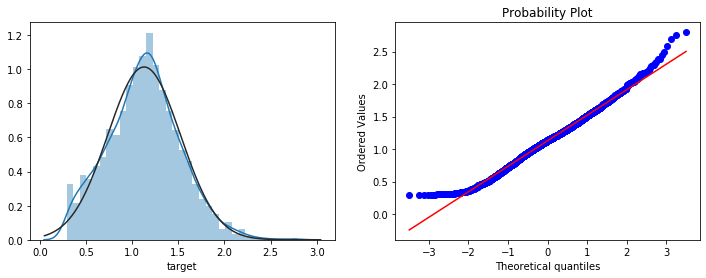

In [24]:
#Log Transform SalePrice to improve normality
sp = data_train.target
data_train.target1 =np.power(1.5,sp)
print(data_train.target1.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data_train.target1.dropna(),fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(data_train.target1.dropna(), plot=plt)

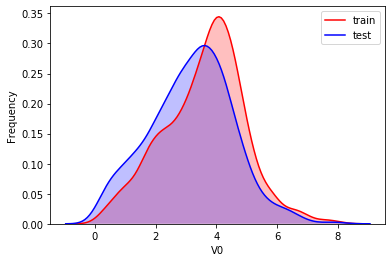

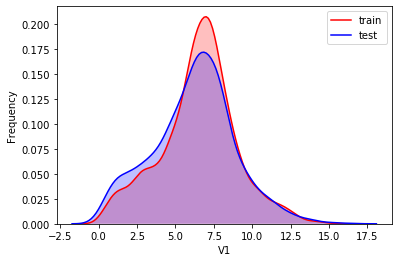

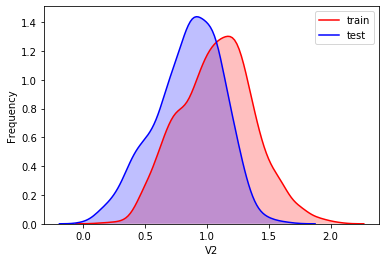

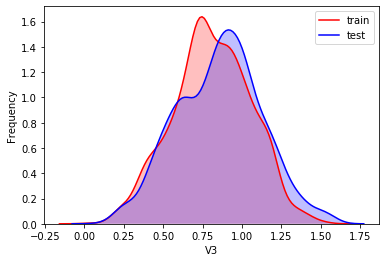

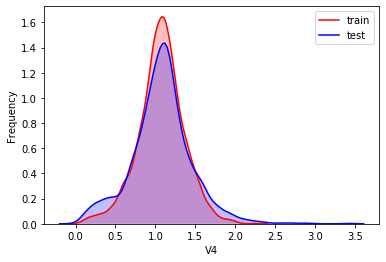

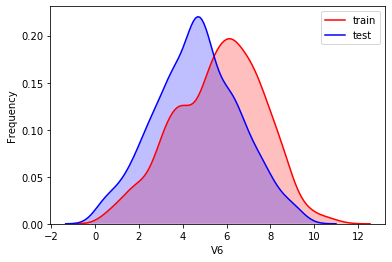

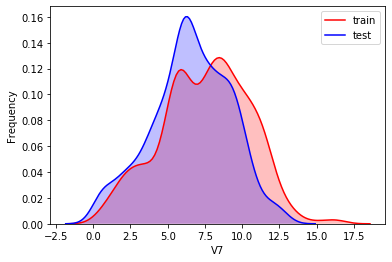

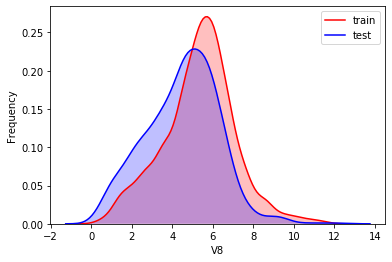

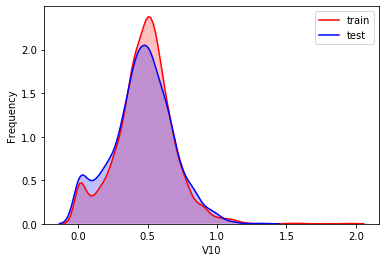

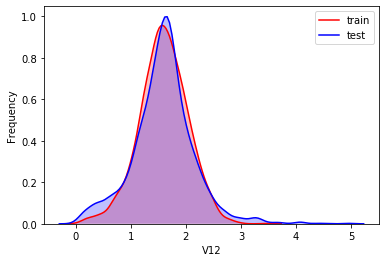

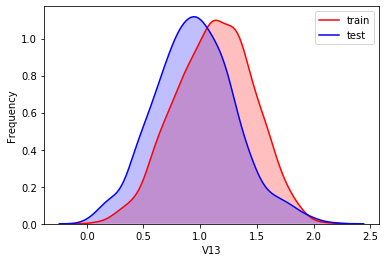

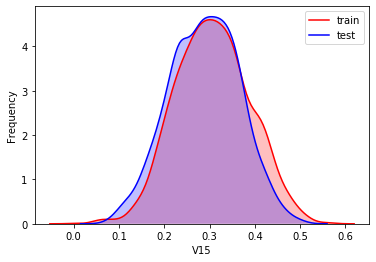

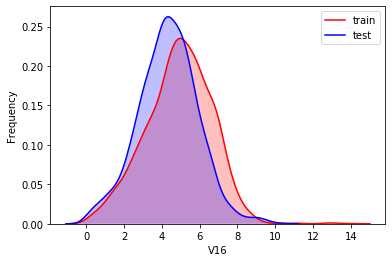

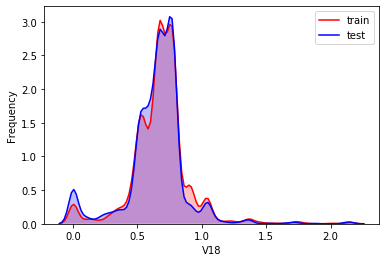

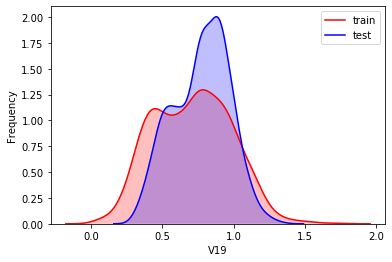

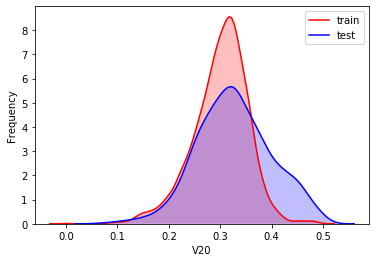

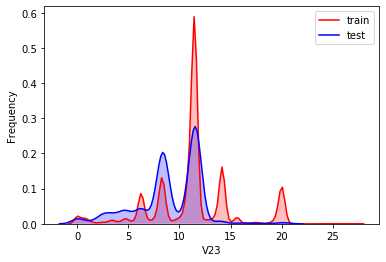

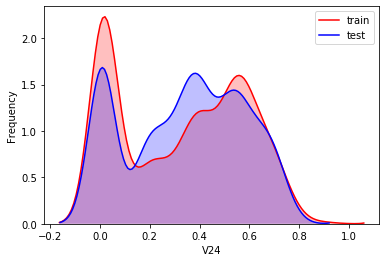

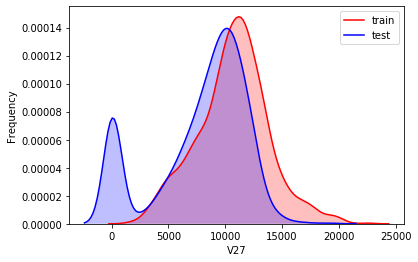

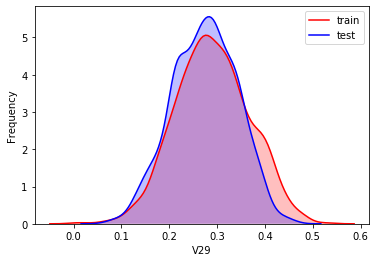

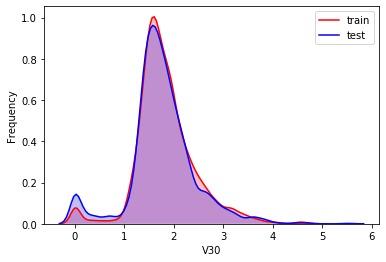

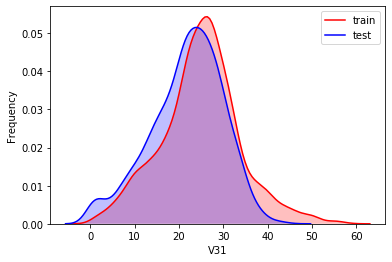

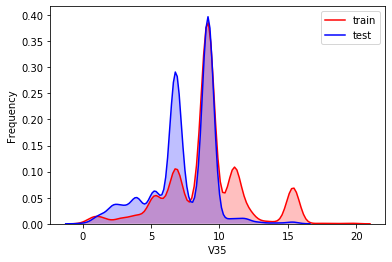

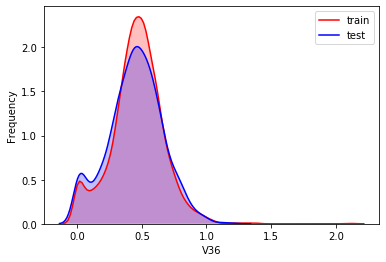

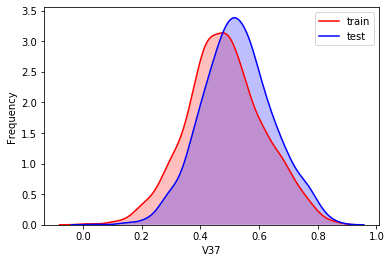

In [25]:
for column in data_all.columns[0:-2]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

In [26]:
# function to get training samples
def get_training_data():
    # extract training samples
    from sklearn.model_selection import train_test_split
    df_train = data_all[data_all["oringin"]=="train"]
    df_train["label"]=data_train.target1
    # split SalePrice and features
    y = df_train.target
    X = df_train.drop(["oringin","target","label"],axis=1)
    X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=100)
    return X_train,X_valid,y_train,y_valid

# extract test data (without SalePrice)
def get_test_data():
    df_test = data_all[data_all["oringin"]=="test"].reset_index(drop=True)
    return df_test.drop(["oringin","target"],axis=1)

In [27]:
from sklearn.metrics import make_scorer
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)
def mse(y_ture,y_pred):
    return mean_squared_error(y_ture,y_pred)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)
mse_scorer = make_scorer(mse, greater_is_better=False)

In [28]:
# function to detect outliers based on the predictions of a model
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers

R2= 0.8766692300840108
rmse= 0.3490086770200252
mse= 0.12180705663526846
---------------------------------------
mean of residuals: 3.016993988738921e-16
std of residuals: 0.34909505461744234
---------------------------------------
22 outliers:
[2655, 2159, 1164, 2863, 1145, 2697, 2528, 2645, 691, 1085, 1874, 2647, 884, 2696, 2668, 1310, 1901, 1458, 2769, 2002, 2669, 1972]


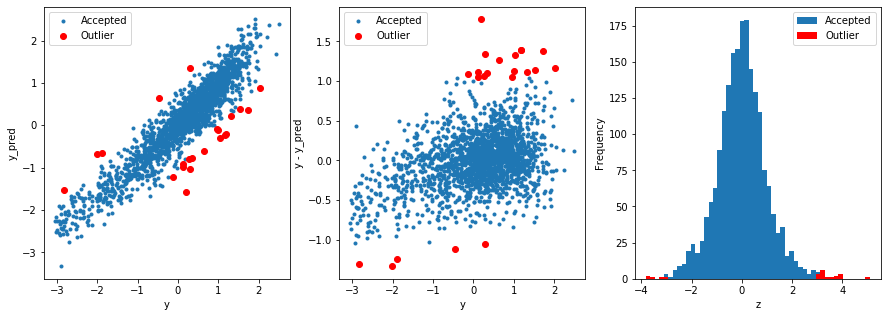

In [29]:
# get training data
from sklearn.linear_model import Ridge
X_train, X_valid,y_train,y_valid = get_training_data()
test=get_test_data()

# find and remove outliers using a Ridge model
outliers = find_outliers(Ridge(), X_train, y_train)

# permanently remove these outliers from the data
#df_train = data_all[data_all["oringin"]=="train"]
#df_train["label"]=data_train.target1
#df_train=df_train.drop(outliers)
X_outliers=X_train.loc[outliers]
y_outliers=y_train.loc[outliers]
X_t=X_train.drop(outliers)
y_t=y_train.drop(outliers)

In [30]:
def get_trainning_data_omitoutliers():
    y1=y_t.copy()
    X1=X_t.copy()
    return X1,y1

In [31]:

from sklearn.preprocessing import StandardScaler
def train_model(model, param_grid=[], X=[], y=[], 
                splits=5, repeats=5):

    # get unmodified training data, unless data to use already specified
    if len(y)==0:
        X,y = get_trainning_data_omitoutliers()
        #poly_trans=PolynomialFeatures(degree=2)
        #X=poly_trans.fit_transform(X)
        #X=MinMaxScaler().fit_transform(X)
    
    # create cross-validation method
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats)
    
    # perform a grid search if param_grid given
    if len(param_grid)>0:
        # setup grid search parameters
        gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                               scoring="neg_mean_squared_error",
                               verbose=1, return_train_score=True)

        # search the grid
        gsearch.fit(X,y)

        # extract best model from the grid
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_

        # get cv-scores for best model
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']

    # no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(X)
    
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('----------------------')
    print('score=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print('mse=',mse(y, y_pred))
    print('cross_val: mean=',cv_mean,', std=',cv_std)
    
    # residual plots
    y_pred = pd.Series(y_pred,index=y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid)/std_resid    
    n_outliers = sum(abs(z)>3)
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y_pred');
    plt.title('corr = {:.3f}'.format(np.corrcoef(y,y_pred)[0][1]))
    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y - y_pred');
    plt.title('std resid = {:.3f}'.format(std_resid))
    
    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))

    return model, cv_score, grid_results

In [32]:
# places to store optimal models and scores
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])

# no. k-fold splits
splits=5
# no. k-fold iterations
repeats=5

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


----------------------
Ridge(alpha=0.25, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
----------------------
score= 0.8926884448727849
rmse= 0.3246640780758279
mse= 0.10540676359282725
cross_val: mean= 0.10910519263745032 , std= 0.008254047062258033


[Parallel(n_jobs=1)]: Done 575 out of 575 | elapsed:    4.1s finished


Text(0, 0.5, 'score')

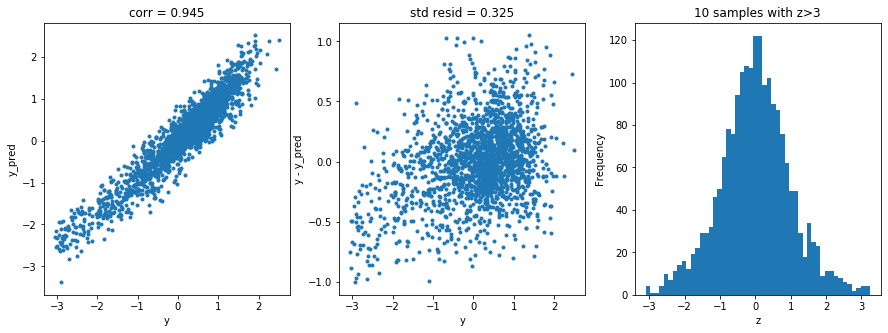

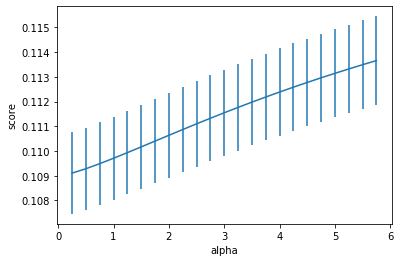

In [33]:
model = 'Ridge'

opt_models[model] = Ridge()
alph_range = np.arange(0.25,6,0.25)
param_grid = {'alpha': alph_range}

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score')

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


----------------------
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
----------------------
score= 0.8927267627154338
rmse= 0.3246061088395706
mse= 0.10536912589596695
cross_val: mean= 0.10895031285915578 , std= 0.006925998636172871


[Parallel(n_jobs=1)]: Done 575 out of 575 | elapsed:    9.7s finished


Text(0, 0.5, 'score')

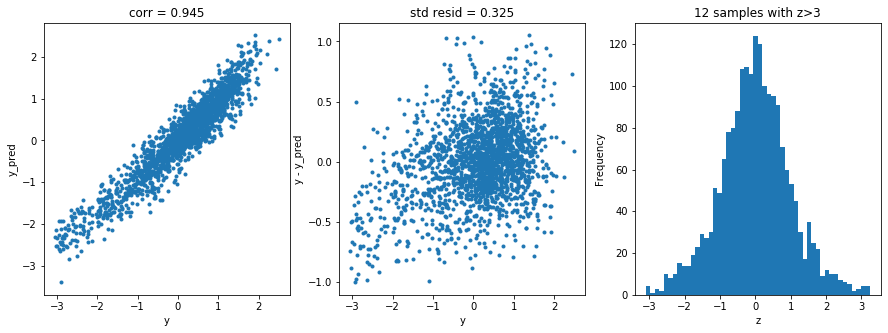

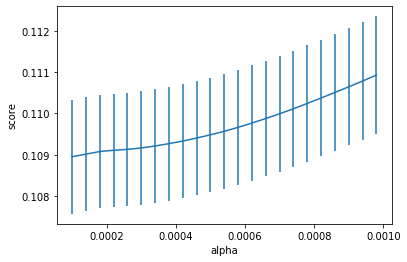

In [34]:
model = 'Lasso'

opt_models[model] = Lasso()
alph_range = np.arange(1e-4,1e-3,4e-5)
param_grid = {'alpha': alph_range}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    7.2s finished


----------------------
ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=100000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
----------------------
score= 0.8927272466952969
rmse= 0.32460537658331856
mse= 0.10536865050679789
cross_val: mean= 0.10914735809494058 , std= 0.005497668492168101


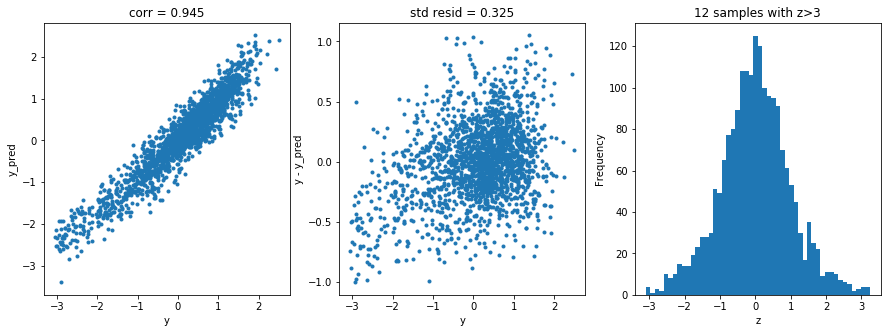

In [35]:
model ='ElasticNet'
opt_models[model] = ElasticNet()

param_grid = {'alpha': np.arange(1e-4,1e-3,1e-4),
              'l1_ratio': np.arange(0.1,1.0,0.1),
              'max_iter':[100000]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 25 folds for each of 9 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   58.7s finished


----------------------
LinearSVR(C=0.30000000000000004, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
----------------------
score= -4.471621232862058
rmse= 2.318296653394245
mse= 5.374499373138961
cross_val: mean= 1.5046749613638355 , std= 2.144877475032408


Text(0, 0.5, 'score')

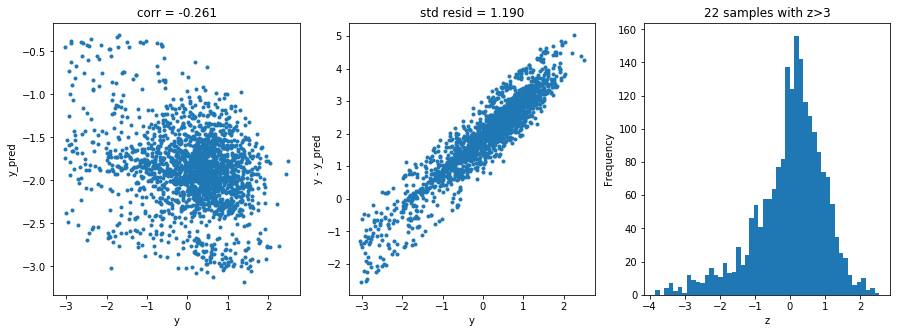

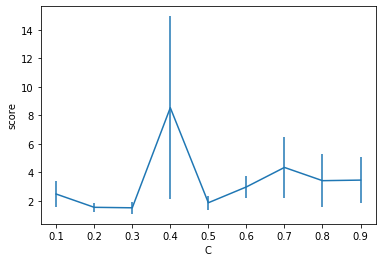

In [36]:
model='LinearSVR'
opt_models[model] = LinearSVR()

crange = np.arange(0.1,1.0,0.1)
param_grid = {'C':crange,
             'max_iter':[1000]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=repeats)


cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(crange, abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('C')
plt.ylabel('score')



Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


----------------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
----------------------
score= 0.7183943407419917
rmse= 0.5259345290142157
mse= 0.2766071288094047
cross_val: mean= 0.3430838278606266 , std= 0.0434786626878986


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s finished


Text(0, 0.5, 'score')

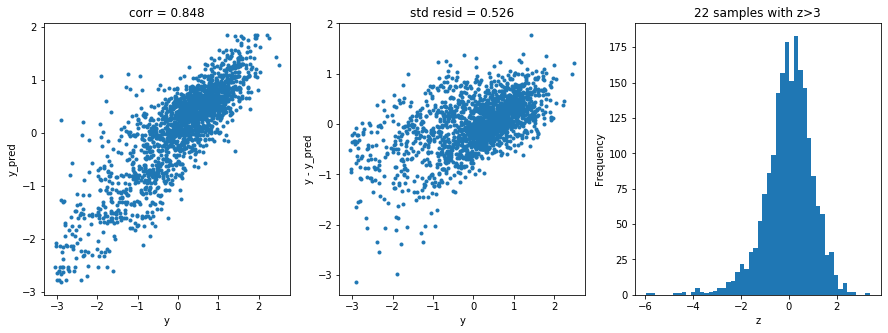

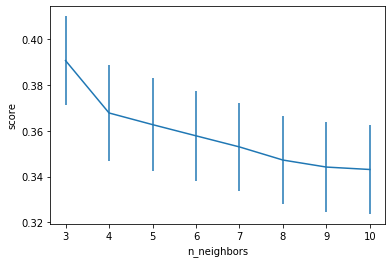

In [37]:
model = 'KNeighbors'
opt_models[model] = KNeighborsRegressor()

param_grid = {'n_neighbors':np.arange(3,11,1)}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(np.arange(3,11,1), abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*1))
plt.xlabel('n_neighbors')
plt.ylabel('score')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  5.1min finished


----------------------
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=350,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
----------------------
score= 0.9741769720443173
rmse= 0.1592628847496729
mse= 0.02536466645878759
cross_val: mean= 0.09941295659469358 , std= 0.006274483207610974


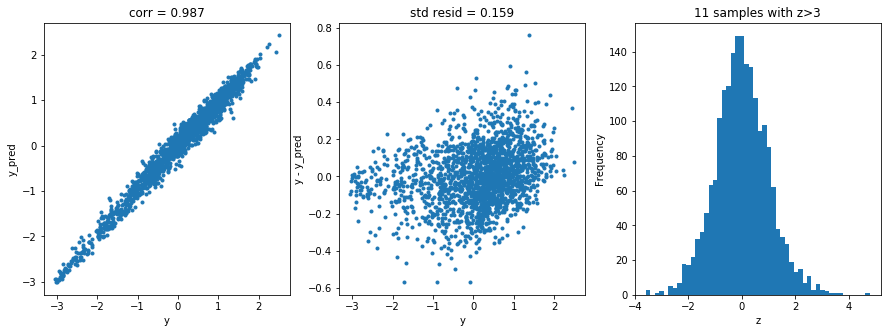

In [38]:
model = 'GradientBoosting'
opt_models[model] = GradientBoostingRegressor()

param_grid = {'n_estimators':[150,250,350],
              'max_depth':[1,2,3],
              'min_samples_split':[5,6,7]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[12:12:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:12:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.7min finished


[12:14:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
----------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
----------------------
score= 0.9690656791801935
rmse= 0.17431360626788683
mse= 0.03038523333011585
cross_val: mean= 0.09825160173250022 , std= 0.006994621819964998


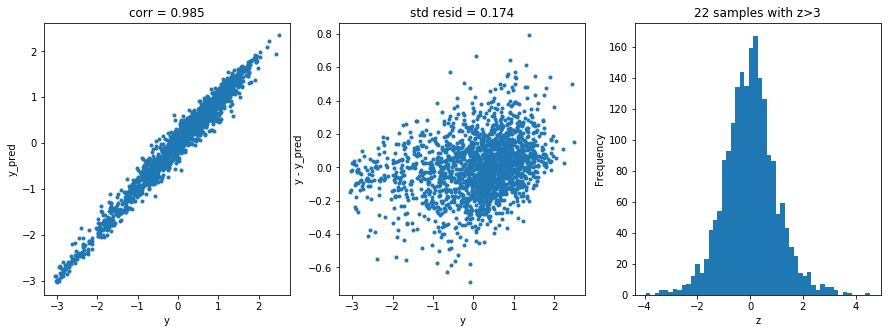

In [39]:
model = 'XGB'
opt_models[model] = XGBRegressor()

param_grid = {'n_estimators':[100,200,300,400,500],
              'max_depth':[1,2,3],
             }

opt_models[model], cv_score,grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 11.4min finished


----------------------
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=12, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
----------------------
score= 0.985854023334266
rmse= 0.11787656286591082
mse= 0.013894884073080987
cross_val: mean= 0.10366126970461524 , std= 0.006291525779598185


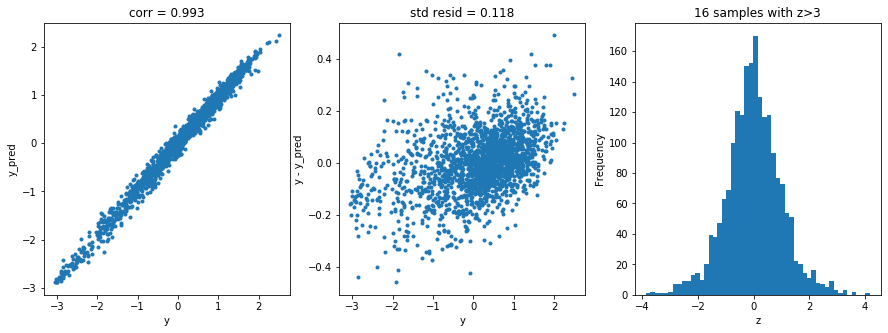

In [40]:
model = 'RandomForest'
opt_models[model] = RandomForestRegressor()

param_grid = {'n_estimators':[100,150,200],
              'max_features':[8,12,16,20,24],
              'min_samples_split':[2,4,6]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=5, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

In [41]:
def model_predict(test_data,test_y=[],stack=False):
    #poly_trans=PolynomialFeatures(degree=2)
    #test_data1=poly_trans.fit_transform(test_data)
    #test_data=MinMaxScaler().fit_transform(test_data)
    i=0
    y_predict_total=np.zeros((test_data.shape[0],))
    if stack:
        for model in metal_models.keys():
            y_predict=metal_models[model].predict(test_data)
            y_predict_total+=y_predict
            i+=1
            if len(test_y)>0:
                print("{}_mse:".format(model),mean_squared_error(y_predict,test_y))
        y_predict_mean=np.round(y_predict_total/i,3)  
        if len(test_y)>0:
            print("mean_mse:",mean_squared_error(y_predict_mean,test_y))
        else:
            y_metal_mean=pd.Series(y_predict_mean)
            return y_metal_mean 
    else:
        for model in opt_models.keys():
            if model!="LinearSVR" and model!="KNeighbors":
                y_predict=opt_models[model].predict(test_data)
                y_predict_total+=y_predict
                i+=1
            if len(test_y)>0:
                print("{}_mse:".format(model),mean_squared_error(y_predict,test_y))
        y_predict_mean=np.round(y_predict_total/i,3)
        if len(test_y)>0:
            print("mean_mse:",mean_squared_error(y_predict_mean,test_y))
        else:
            y_predict_mean=pd.Series(y_predict_mean)
            return y_predict_mean

In [42]:
model_predict(X_valid,y_valid)

Ridge_mse: 0.141137159787438
Lasso_mse: 0.14101450747297176
ElasticNet_mse: 0.14102617230142994
LinearSVR_mse: 0.14102617230142994
KNeighbors_mse: 0.14102617230142994
GradientBoosting_mse: 0.13164434297351507
XGB_mse: 0.13667275282995228
RandomForest_mse: 0.13942371874689222
mean_mse: 0.12674696655132642


In [43]:
def create_stack_features(test_data):
    features={}
    columns=[]
    for model in opt_models.keys():
        columns.append(model)
        features[model]=opt_models[model].predict(test_data)
    stack_feature=pd.DataFrame(features,columns=columns)
    return stack_feature

In [44]:
#load metal data
metal_x_train=create_stack_features(X_t)
metal_y_train=pd.Series(y_t.values)
metal_x_valid=create_stack_features(X_valid)
metal_y_valid=pd.Series(y_valid.values)
metal_x_test=create_stack_features(test)

In [45]:
# places to store metal models and scores
metal_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])

# no. k-fold splits
splits=5
# no. k-fold iterations
repeats=5

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


----------------------
Ridge(alpha=0.25, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
----------------------
score= 0.992023881613237
rmse= 0.08851294501810426
mse= 0.007834541435777944
cross_val: mean= 0.00794401336283411 , std= 0.0007395511943484178


[Parallel(n_jobs=1)]: Done 575 out of 575 | elapsed:    4.5s finished


Text(0, 0.5, 'score')

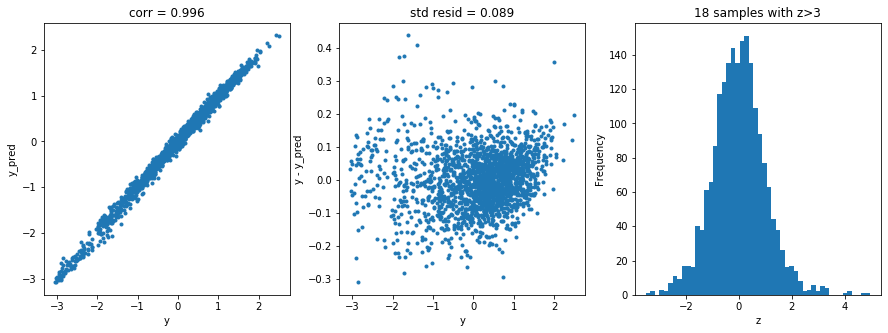

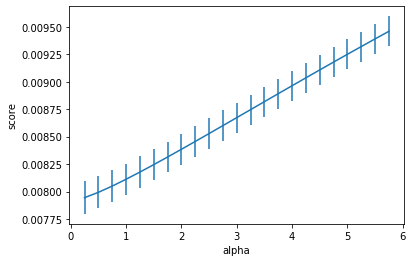

In [46]:
model = 'Ridge'

metal_models[model] = Ridge()
alph_range = np.arange(0.25,6,0.25)
param_grid = {'alpha': alph_range}

metal_models[model],cv_score,grid_results = train_model(metal_models[model], param_grid=param_grid, X=metal_x_train,y=metal_y_train,
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score')

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


----------------------
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
----------------------
score= 0.9919536010304358
rmse= 0.0889020502055382
mse= 0.007903574530748024
cross_val: mean= 0.007992143219302712 , std= 0.0007741801286836838


[Parallel(n_jobs=1)]: Done 575 out of 575 | elapsed:    6.5s finished


Text(0, 0.5, 'score')

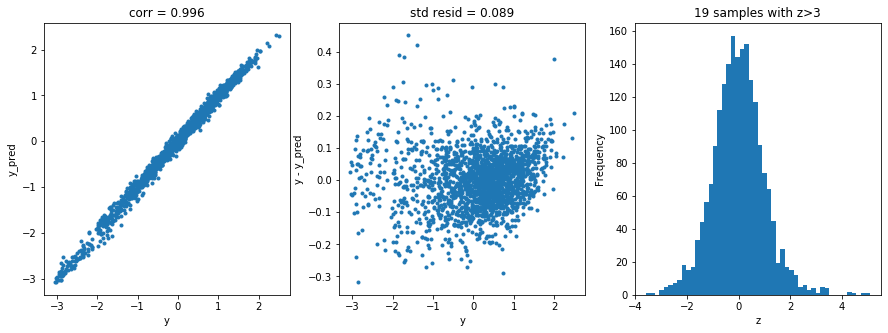

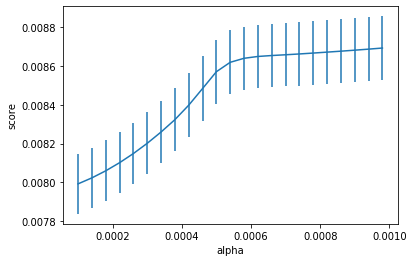

In [47]:
model = 'Lasso'

metal_models[model] = Lasso()
alph_range = np.arange(1e-4,1e-3,4e-5)
param_grid = {'alpha': alph_range}

metal_models[model], cv_score, grid_results = train_model(metal_models[model], param_grid=param_grid, X=metal_x_train,y=metal_y_train,
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    9.7s finished


----------------------
ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=100000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
----------------------
score= 0.992023626330401
rmse= 0.08851436147494049
mse= 0.00783479218731642
cross_val: mean= 0.007886334310558248 , std= 0.0003194579206857638


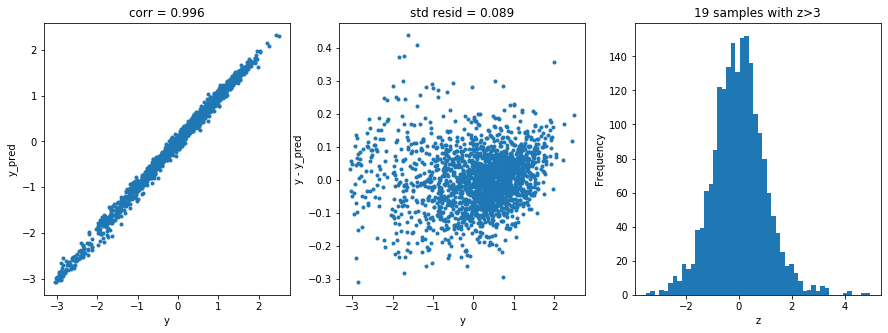

In [48]:
model ='ElasticNet'
metal_models[model] = ElasticNet()

param_grid = {'alpha': np.arange(1e-4,1e-3,1e-4),
              'l1_ratio': np.arange(0.1,1.0,0.1),
              'max_iter':[100000]}

metal_models[model], cv_score, grid_results = train_model(metal_models[model], param_grid=param_grid, X=metal_x_train,y=metal_y_train,
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[13:30:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[13:30:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   39.9s finished


[13:31:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
----------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
----------------------
score= 0.9956678959192424
rmse= 0.0652319612756376
mse= 0.004255208771866276
cross_val: mean= 0.008943854233276625 , std= 0.00028006340765748675


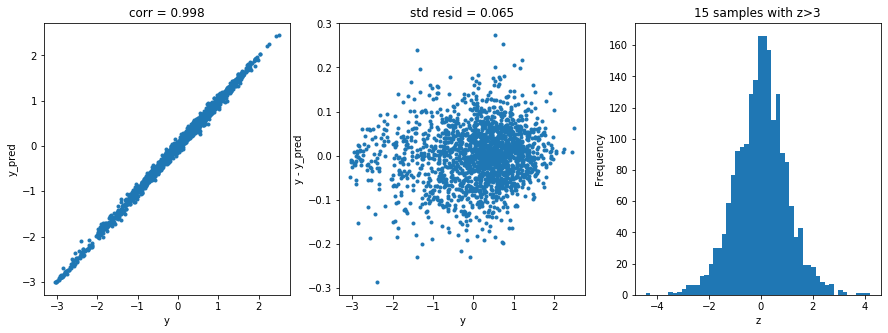

In [50]:
model = 'XGB'
metal_models[model] = XGBRegressor()

param_grid = {'n_estimators':[100,200,300,400,500],
              'max_depth':[1,2,3],
             }

metal_models[model], cv_score,grid_results = train_model(metal_models[model], param_grid=param_grid, X=metal_x_train,y=metal_y_train,
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.9min finished


----------------------
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=350,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
----------------------
score= 0.9970467321402985
rmse= 0.05385951207176152
mse= 0.0029008470406082275
cross_val: mean= 0.00921723291432373 , std= 0.0008384744140750366


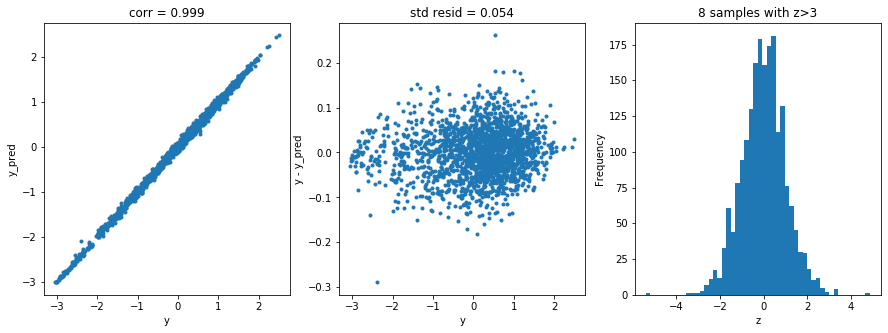

In [51]:
model = 'GradientBoosting'
metal_models[model] = GradientBoostingRegressor()

param_grid = {'n_estimators':[150,250,350],
              'max_depth':[1,2,3],
              'min_samples_split':[5,6,7]}

metal_models[model], cv_score, grid_results = train_model(metal_models[model], param_grid=param_grid, X=metal_x_train,y=metal_y_train,
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.9min finished


----------------------
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
----------------------
score= 0.9978995065600386
rmse= 0.0454225655116097
mse= 0.0020632094576564764
cross_val: mean= 0.009117254081401141 , std= 0.00019414696261932298


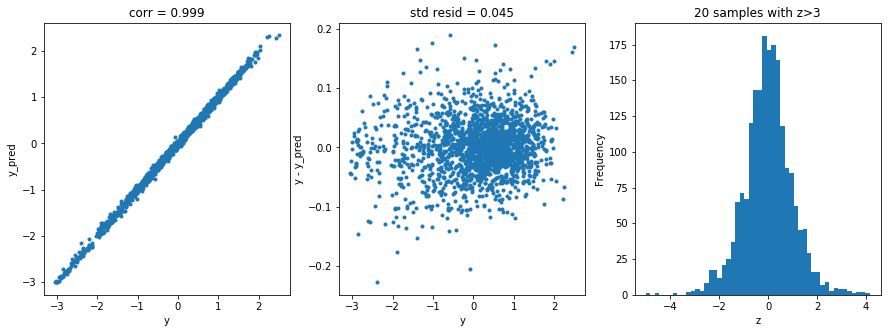

In [52]:
model = 'RandomForest'
metal_models[model] = RandomForestRegressor()

param_grid = {'n_estimators':[100,150,200],
              'max_features':[2,3,4,5],
              'min_samples_split':[2,4,6]}

metal_models[model], cv_score, grid_results = train_model(metal_models[model], param_grid=param_grid,  X=metal_x_train,y=metal_y_train,
                                              splits=5, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

In [53]:
model_predict(metal_x_valid,metal_y_valid,stack=True)

Ridge_mse: 0.14816737818954145
Lasso_mse: 0.14948264813036655
ElasticNet_mse: 0.14824311760664294
XGB_mse: 0.14644237229503698
GradientBoosting_mse: 0.14588900141052583
RandomForest_mse: 0.14268981489397795
mean_mse: 0.14540125374855822


In [57]:
def model_predict(test_data,test_y=[],stack=False):
    #poly_trans=PolynomialFeatures(degree=2)
    #test_data1=poly_trans.fit_transform(test_data)
    #test_data=MinMaxScaler().fit_transform(test_data)
    i=0
    y_predict_total=np.zeros((test_data.shape[0],))
    if stack:
        for model in metal_models.keys():
            y_predict=metal_models[model].predict(test_data)
            y_predict_total+=y_predict
            i+=1
            if len(test_y)>0:
                print("{}_mse:".format(model),mean_squared_error(y_predict,test_y))
        y_predict_mean=np.round(y_predict_total/i,3)  
        if len(test_y)>0:
            print("mean_mse:",mean_squared_error(y_predict_mean,test_y))
        else:
            y_metal_mean=pd.Series(y_predict_mean)
            return y_metal_mean 
    else:
        for model in opt_models.keys():
            if model!="LinearSVR" and model!="KNeighbors":
                y_predict=opt_models[model].predict(test_data)
                y_predict_total+=y_predict
                i+=1
            if len(test_y)>0:
                print("{}_mse:".format(model),mean_squared_error(y_predict,test_y))
        y_predict_mean=np.round(y_predict_total/i,3)
        if len(test_y)>0:
            print("mean_mse:",mean_squared_error(y_predict_mean,test_y))
        else:
            y_predict_mean=pd.Series(y_predict_mean)
            return y_predict_mean

In [59]:
predict_result = model_predict(test)
predict_result.to_csv('./result.txt',index=False,header=False)
test_features = create_stack_features(test)
predict_result = model_predict(test_features,stack=True)
predict_result.to_csv('./result_stack.txt',index=False,header=False)
